数据集下载链接：https://pan.baidu.com/s/1NWYEyfE06anmE3z4NBS5JA?pwd=dl5t 
提取码：dl5t 
--来自百度网盘超级会员V3的分享

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

获取数据

In [55]:
train = pd.read_csv('train.csv')
train.head(), train.shape

(   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
 0      1       0       0       0       0       0       0       0       0   
 1      0       0       0       0       0       0       0       0       0   
 2      1       0       0       0       0       0       0       0       0   
 3      4       0       0       0       0       0       0       0       0   
 4      0       0       0       0       0       0       0       0       0   
 
    pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel780  pixel781  pixel782  pixel783  
 0         0   

In [71]:
train_image = train.drop(columns=["label"])
train_label = train.loc[:, "label"]

train_image, train_label

(       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 41995       0       0       0       0       0       0       0       0       0   
 41996       0       0       0       0       0       0       0       0       0   
 41997       0       0       0       0       0       0       0       0       0   
 41998       0       0       0       0       0       0       0       0       0   
 41999       0       0       0       0       0       0       0       0       0   
 
        pixel9

查看具体图像

In [57]:
train_image_values = train_image.iloc[0, :].values
train_image_values=train_image_values.reshape(28, 28)

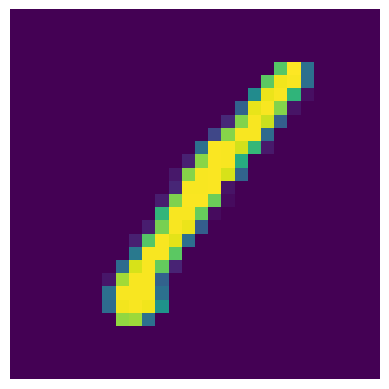

In [58]:
plt.imshow(train_image_values)
plt.axis('off')
plt.show()

In [59]:
#自动化查看
def to_plot(n):
    num = train_image.iloc[n , :].values.reshape(28, 28)
    plt.imshow(num)
    plt.axis('off')
    plt.show()

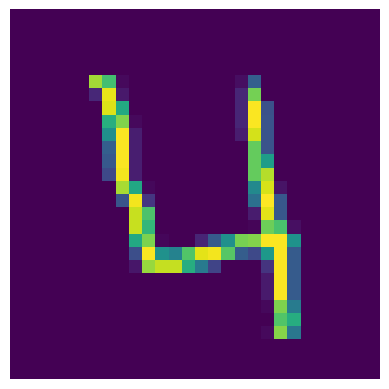

In [60]:
to_plot(n=3)

数据处理

In [61]:
#对数据特征值进行归一化处理
train_image = train_image.values / 255

train_label = train_label.values

In [62]:
#数据集分割
x_train,x_val, y_train,y_val = train_test_split(train_image, train_label, train_size=0.8, random_state=0)

模型训练

In [63]:
#数据降维，多次用pca确定最后的最优模型
import time
from sklearn.decomposition import PCA
def n_componenta_analysis(n, x_train, y_train, x_val, y_val):
    start_time = time.time()
    pca = PCA(n_components=n)
    print('特征降维，传递的参数为：{}'.format(n))
    pca.fit(x_train)

    #在训练集和测试集实现降维
    x_train_pca = pca.transform(x_train)
    x_val_pca = pca.transform(x_val)

    #利用svc进行训练
    print('开始用svc进行训练')
    ss = svm.SVC()
    ss.fit(x_train_pca, y_train)

    #获取结果
    accuracy = ss.score(x_val_pca, y_val)

    end = time.time()
    print("准确率是：{}， 消耗时间是：{}s".format(accuracy, int(end-start_time)))
    return accuracy

In [64]:
#传入多个n_components， 寻找合理的n
n_s = np.linspace(0.70, 0.85, num=5)
accuracy = []
for n in n_s:
    tmp = n_componenta_analysis(n, x_train, y_train, x_val, y_val)
    accuracy.append(tmp)

特征降维，传递的参数为：0.7
开始用svc进行训练
准确率是：0.9761904761904762， 消耗时间是：11s
特征降维，传递的参数为：0.7374999999999999
开始用svc进行训练
准确率是：0.9779761904761904， 消耗时间是：11s
特征降维，传递的参数为：0.7749999999999999
开始用svc进行训练
准确率是：0.9783333333333334， 消耗时间是：12s
特征降维，传递的参数为：0.8125
开始用svc进行训练
准确率是：0.9798809523809524， 消耗时间是：14s
特征降维，传递的参数为：0.85
开始用svc进行训练
准确率是：0.9803571428571428， 消耗时间是：18s


准确率可视化展示

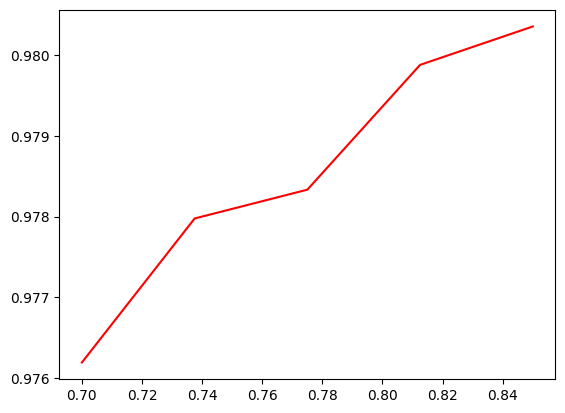

In [65]:
plt.plot(n_s, np.array(accuracy), 'r')
plt.show()

确定最优模型


In [66]:
pca = PCA(n_components=0.80)
pca.fit(x_train)
pca.n_components_

43

In [67]:
x_train_pca = pca.transform(x_train)
x_val_pca = pca.transform(x_val)
x_train_pca.shape, x_val_pca.shape

((33600, 43), (8400, 43))

In [68]:
#训练比较优的模型
ss1 = svm.SVC()

ss1.fit(x_train_pca, y_train)

ss1.score(x_val_pca, y_val)

0.979047619047619

测试集驾到！


In [75]:
test_data = pd.read_csv('test.csv')
test_data.head()

#数据预处理
test_image = test_data.values / 255
x_test = pca.transform(test_image)

y_predict = ss1.predict(x_test)
y_predict

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)